## Preprocessing

In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split

In [2]:
data1 = pd.read_csv("C:/Users/yunit/Downloads/analisis-sosial-media-main/azarine_Agt12.csv")
data2 = pd.read_csv("C:/Users/yunit/Downloads/analisis-sosial-media-main/azarine_Agt810.csv")
data3 = pd.read_csv("C:/Users/yunit/Downloads/analisis-sosial-media-main/azarine_Agt1516.csv")
data4 = pd.read_csv("C:/Users/yunit/Downloads/analisis-sosial-media-main/azarine_Agt2223.csv")
data5 = pd.read_csv("C:/Users/yunit/Downloads/analisis-sosial-media-main/azarine_Sep12.csv")
data6 = pd.read_csv("C:/Users/yunit/Downloads/analisis-sosial-media-main/azarine_Sep810.csv")
data7 = pd.read_csv("C:/Users/yunit/Downloads/analisis-sosial-media-main/azarine_Sep1516.csv")

# Menggabungkan semua dataframe secara vertikal
dataset = pd.concat([data1, data2, data3, data4, data5, data6, data7], ignore_index=True)

# Menampilkan hasil gabungan
print(dataset)

      conversation_id_str                      created_at  favorite_count  \
0     1819522350448083282  Fri Aug 02 23:55:08 +0000 2024               1   
1     1819282637896532132  Fri Aug 02 22:49:44 +0000 2024               0   
2     1819436611425419435  Fri Aug 02 18:14:26 +0000 2024               0   
3     1819434300607173043  Fri Aug 02 18:05:15 +0000 2024               0   
4     1819247269960691742  Fri Aug 02 17:55:38 +0000 2024               0   
...                   ...                             ...             ...   
1418  1835147140655669688  Sun Sep 15 02:42:28 +0000 2024               0   
1419  1835142127476785369  Sun Sep 15 02:22:33 +0000 2024               0   
1420  1835102249582051333  Sun Sep 15 02:10:57 +0000 2024               1   
1421  1835119763691127104  Sun Sep 15 01:57:58 +0000 2024               0   
1422  1834965594497753187  Sun Sep 15 01:50:24 +0000 2024               0   

                                              full_text               id_st

In [3]:
# dataset = pd.read_csv("C:/Users/yunit/Downloads/azarine.csv")

# Menghapus baris di mana kolom 'username' mengandung kata 'azarine'
dataset = dataset[~dataset['username'].str.contains('azarine', case=False, na=False)]

#Menghapus kolom yang tidak diperlukan
dataset = dataset.drop(columns=['conversation_id_str', 'id_str', 'image_url', 'location', 'tweet_url', 'user_id_str', 'in_reply_to_screen_name', 'lang'])

dataset

,created_at,favorite_count,full_text,quote_count,reply_count,retweet_count,username
0,Fri Aug 02 23:55:08 +0000 2024,1,ss azarine ini bikin kucel ga ya? kalau iya s...,0,22,0,baseconvo
1,Fri Aug 02 22:49:44 +0000 2024,0,@aceaurs Azarine kak anak ny temen ku usia rem...,0,1,0,yayangke
2,Fri Aug 02 18:14:26 +0000 2024,0,Aku nemu promo menarik di Lazada nih. Yuk coba...,0,0,0,disc_beauty
3,Fri Aug 02 18:05:15 +0000 2024,0,Kode Kecantikan ️ 3 Agu ⏰️ 00:00 sampai habis ...,1,0,0,AkulahPara
4,Fri Aug 02 17:55:38 +0000 2024,0,@JY15O1 NAHHH BEGO NYA AKU PAKE AZARINE JUGA I...,0,0,0,calovessa
...,...,...,...,...,...,...,...
1418,Sun Sep 15 02:42:28 +0000 2024,0,Cek [GEL] Azarine Hydrasoothe Sunscreen Gel SP...,0,0,0,Affilateshopee
1419,Sun Sep 15 02:22:33 +0000 2024,0,plss sunscreen azarine ini rekomend bgtt guyss...,0,0,0,rccchaa
1420,Sun Sep 15 02:10:57 +0000 2024,1,@ohmy_beautybank sejauh ini azarine calm my ac...,0,0,0,yoonginin
1421,Sun Sep 15 01:57:58 +0000 2024,0,@bynbiiys_blight Aku dari dulu nunggu yang wak...,0,1,0,Jenowsiee


In [4]:
#Melihat data yang duplikat
dataset['full_text'].duplicated().sum()

5

In [5]:
#Melihat missing value
dataset.isna().sum()

created_at        0
favorite_count    0
full_text         0
quote_count       0
reply_count       0
retweet_count     0
username          0
dtype: int64

In [6]:
slang_df = pd.read_csv("C:/Users/yunit/Downloads/analisis-sosial-media-main/colloquial-indonesian-lexicon.csv")  # Kamus slang dengan kolom 'slang' dan 'formal
slang_df = slang_df.drop(columns=['In-dictionary', 'context', 'category1', 'category2', 'category3'])
print(slang_df)

          slang         formal
0          woww            wow
1         aminn           amin
2           met        selamat
3        netaas        menetas
4       keberpa       keberapa
...         ...            ...
15001  gataunya  enggak taunya
15002      gtau     enggak tau
15003     gatau     enggak tau
15004     fans2        fan-fan
15005   gaharus   enggak harus

[15006 rows x 2 columns]


In [7]:
# Pembersihan Teks
def clean_text(text):
    # Lowercasing
    text = text.lower()
    # Hapus URL
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Hapus Mention dan Hashtag
    text = re.sub(r'@\w+|#\w+', '', text)
    # Hapus Angka dan Simbol
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Hapus White Spaces Berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

dataset['full_text'] = dataset['full_text'].apply(clean_text)

# Normalisasi
# Membuat kamus slang dari dataframe
slang_dict = pd.Series(slang_df.formal.values, index=slang_df.slang).to_dict()

def normalize_text(text):
    words = text.split()
    normalized_words = [slang_dict[word] if word in slang_dict else word for word in words]
    return ' '.join(normalized_words)

dataset['full_text'] = dataset['full_text'].apply(normalize_text)

# Tokenization
dataset['tokens'] =dataset['full_text'].apply(lambda x: word_tokenize(x))

# Stop Words Removal
stop_words = set(stopwords.words('indonesian'))
dataset['tokens'] = dataset['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
dataset['full_text'] = dataset['full_text'].apply(lambda x: stemmer.stem(x))

# 6. Handling Negation (Opsional)
def handle_negation(tokens):
    negation_words = {'tidak', 'bukan', 'belum', 'jangan'}
    processed_tokens = []
    skip_next = False
    for i, word in enumerate(tokens):
        if skip_next:
            skip_next = False
            continue
        if word in negation_words and i + 1 < len(tokens):
            processed_tokens.append(word + '_' + tokens[i + 1])
            skip_next = True
        else:
            processed_tokens.append(word)
    return processed_tokens

dataset['tokens'] = dataset['tokens'].apply(handle_negation)

# Contoh output
dataset

KeyboardInterrupt: 

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import ast  # Untuk mengubah string menjadi list

# Membaca file CSV
df = pd.read_csv("C:/Users/yunit/Downloads/sentiment_analysis_result.csv")

# Jika 'tokens' adalah string yang menyerupai list, gunakan ast.literal_eval untuk mengonversinya kembali menjadi list
df['tokens'] = df['tokens'].apply(ast.literal_eval)

# Menggabungkan token menjadi teks
df['tokens_as_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Cek apakah hasil token_as_text sudah benar
print(df['tokens_as_text'].head())

# Membuat TfidfVectorizer dengan parameter sesuai
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)

# Menggunakan TfidfVectorizer pada kolom 'tokens_as_text'
tfidf_matrix = tfidf.fit_transform(df['tokens_as_text'])

# Mendapatkan fitur kata (kolom) dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Mengubah hasil menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Menampilkan hasil
print(tfidf_df)


0    ss azarine bikin kucel enggak_ya iya saran ss ...
1    azarine kak anak nya teman ku usia remaja ngik...
2    nemu promo tarik lazada nih yuk coba lihat nam...
3    kode cantik agu habis diskon sd ribu minbel ri...
4    bego nya pakai azarine enggak_habishabis jaran...
Name: tokens_as_text, dtype: object
      acid      acne  affordable  agustus   ah      ajar  ajg  ala  alcohol  \
0      0.0  0.000000         0.0      0.0  0.0  0.367419  0.0  0.0      0.0   
1      0.0  0.000000         0.0      0.0  0.0  0.000000  0.0  0.0      0.0   
2      0.0  0.000000         0.0      0.0  0.0  0.000000  0.0  0.0      0.0   
3      0.0  0.000000         0.0      0.0  0.0  0.000000  0.0  0.0      0.0   
4      0.0  0.000000         0.0      0.0  0.0  0.000000  0.0  0.0      0.0   
...    ...       ...         ...      ...  ...       ...  ...  ...      ...   
1406   0.0  0.000000         0.0      0.0  0.0  0.000000  0.0  0.0      0.0   
1407   0.0  0.000000         0.0      0.0  0.0  0.000000 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

X = tfidf.fit_transform(df['tokens_as_text'])  # Fitur (TF-IDF dari teks)

# Target label (sesuaikan dengan kolom sentimen yang Anda gunakan)
y = df['sentiment']  # Pastikan 'sentiment' adalah kolom yang benar

# Pisahkan data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
model = MultinomialNB()

# Latih model dengan data latih
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi hasil
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7667844522968198
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        14
     Neutral       0.77      0.98      0.86       201
    Positive       0.78      0.31      0.44        68

    accuracy                           0.77       283
   macro avg       0.51      0.43      0.43       283
weighted avg       0.73      0.77      0.72       283



C:\Users\yunit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yunit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yunit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

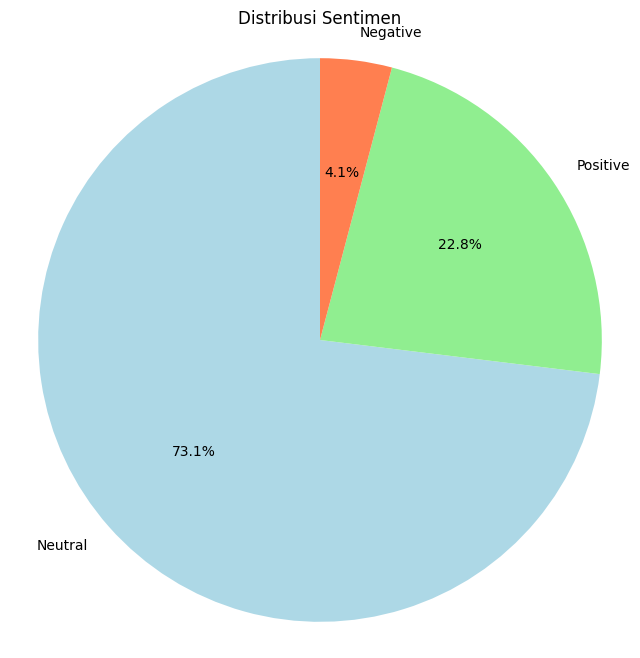

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing sentimen
sentiment_counts = df['sentiment'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))  # Ukuran pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'coral'])
plt.title('Distribusi Sentimen')
plt.axis('equal')  # Untuk membuat pie chart terlihat bulat
plt.show()

In [11]:
sentiment_counts

sentiment
Neutral     1031
Positive     322
Negative      58
Name: count, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Inisialisasi model Naive Bayes
model = MultinomialNB()

# Latih model dengan data latih yang sudah di-resample
model.fit(X_train_res, y_train_res)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi hasil
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5547703180212014
Classification Report:
               precision    recall  f1-score   support

    Negative       0.13      0.43      0.20        14
     Neutral       0.85      0.55      0.67       201
    Positive       0.38      0.60      0.46        68

    accuracy                           0.55       283
   macro avg       0.45      0.53      0.44       283
weighted avg       0.70      0.55      0.59       283



In [13]:
print(y_train_res.value_counts())

sentiment
Neutral     830
Positive    830
Negative    830
Name: count, dtype: int64


In [14]:
from imblearn.combine import SMOTEENN

# Terapkan kombinasi SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

# Inisialisasi model Naive Bayes
model = MultinomialNB()

# Latih model dengan data latih yang sudah di-resample
model.fit(X_train_res, y_train_res)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi hasil
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.36042402826855124
Classification Report:
               precision    recall  f1-score   support

    Negative       0.11      0.50      0.18        14
     Neutral       0.93      0.21      0.34       201
    Positive       0.31      0.78      0.44        68

    accuracy                           0.36       283
   macro avg       0.45      0.50      0.32       283
weighted avg       0.74      0.36      0.36       283



In [15]:
print(y_train_res.value_counts())

sentiment
Negative    823
Positive    745
Neutral     320
Name: count, dtype: int64


In [16]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Tentukan berapa banyak yang diinginkan untuk oversampling per kelas
over = RandomOverSampler(sampling_strategy={'Positive': 600, 'Negative': 200})  # Sesuaikan dengan kebutuhan Anda

# Terapkan oversampling pada data latih
X_over, y_over = over.fit_resample(X_train, y_train)
print(f"Oversampled: {Counter(y_over)}")

# Setelah oversampling, lakukan undersampling
under = RandomUnderSampler(sampling_strategy={'Neutral': 830})  # Sesuaikan dengan kebutuhan Anda
X_res, y_res = under.fit_resample(X_over, y_over)
print(f"After undersampling: {Counter(y_res)}")

# Inisialisasi model Naive Bayes
model = MultinomialNB()

# Latih model dengan data latih yang sudah di-resample
model.fit(X_res, y_res)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi hasil
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Oversampled: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
After undersampling: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
Accuracy: 0.7137809187279152
Classification Report:
               precision    recall  f1-score   support

    Negative       0.56      0.36      0.43        14
     Neutral       0.85      0.77      0.81       201
    Positive       0.46      0.62      0.53        68

    accuracy                           0.71       283
   macro avg       0.62      0.58      0.59       283
weighted avg       0.74      0.71      0.72       283



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Memuat data (gantilah dengan jalur file Anda)
# df = pd.read_csv('path_to_your_data.csv') 
# Asumsi df memiliki kolom 'text' untuk tweet dan 'sentiment' untuk label

# Ganti ini sesuai kolom teks yang sudah ditokenisasi
X = df['tokens_as_text']  
y = df['sentiment']  # Sesuaikan ini dengan kolom label Anda

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan RandomOverSampler untuk oversampling
over = RandomOverSampler(sampling_strategy={'Positive': 600, 'Negative': 200})  # Sesuaikan kebutuhan
X_over, y_over = over.fit_resample(X_train.values.reshape(-1, 1), y_train)
print(f"Oversampled: {Counter(y_over)}")

# Menggunakan RandomUnderSampler untuk undersampling
under = RandomUnderSampler(sampling_strategy={'Neutral': 830})  # Sesuaikan kebutuhan
X_res, y_res = under.fit_resample(X_over, y_over)
print(f"After undersampling: {Counter(y_res)}")

# Mengubah teks menjadi fitur menggunakan TF-IDF
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X_train_tfidf = tfidf.fit_transform(X_res.ravel())
X_test_tfidf = tfidf.transform(X_test)

# Inisialisasi dan latih model SVM
model = SVC(kernel='linear')  # Anda bisa mengganti kernel sesuai kebutuhan
model.fit(X_train_tfidf, y_res)

# Prediksi pada data uji
y_pred = model.predict(X_test_tfidf)

# Evaluasi hasil
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Distribution of labels in training set: {Counter(y_res)}")
print(f"Distribution of labels in test set: {Counter(y_test)}")


Oversampled: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
After undersampling: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
Accuracy: 0.7420494699646644
Classification Report:
               precision    recall  f1-score   support

    Negative       0.17      0.07      0.10        14
     Neutral       0.81      0.87      0.84       201
    Positive       0.56      0.50      0.53        68

    accuracy                           0.74       283
   macro avg       0.51      0.48      0.49       283
weighted avg       0.72      0.74      0.73       283

Distribution of labels in training set: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
Distribution of labels in test set: Counter({'Neutral': 201, 'Positive': 68, 'Negative': 14})


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import ComplementNB

# Memuat data (gantilah dengan jalur file Anda)
# df = pd.read_csv('path_to_your_data.csv') 
# Asumsi df memiliki kolom 'text' untuk tweet dan 'sentiment' untuk label

# Ganti ini sesuai kolom teks yang sudah ditokenisasi
X = df['tokens_as_text']  
y = df['sentiment']  # Sesuaikan ini dengan kolom label Anda

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan RandomOverSampler untuk oversampling
over = RandomOverSampler(sampling_strategy={'Positive': 600, 'Negative': 200})  # Sesuaikan kebutuhan
X_over, y_over = over.fit_resample(X_train.values.reshape(-1, 1), y_train)
print(f"Oversampled: {Counter(y_over)}")

# Menggunakan RandomUnderSampler untuk undersampling
under = RandomUnderSampler(sampling_strategy={'Neutral': 830})  # Sesuaikan kebutuhan
X_res, y_res = under.fit_resample(X_over, y_over)
print(f"After undersampling: {Counter(y_res)}")

# Mengubah teks menjadi fitur menggunakan TF-IDF
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X_train_tfidf = tfidf.fit_transform(X_res.ravel())
X_test_tfidf = tfidf.transform(X_test)

# Inisialisasi dan latih model Complement Naive Bayes
model = ComplementNB()
model.fit(X_train_tfidf, y_res)

# Prediksi pada data uji
y_pred = model.predict(X_test_tfidf)

# Evaluasi hasil
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Distribution of labels in training set: {Counter(y_res)}")
print(f"Distribution of labels in test set: {Counter(y_test)}")

Oversampled: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
After undersampling: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
Accuracy: 0.6325088339222615
Classification Report:
               precision    recall  f1-score   support

    Negative       0.11      0.21      0.14        14
     Neutral       0.84      0.67      0.75       201
    Positive       0.44      0.60      0.51        68

    accuracy                           0.63       283
   macro avg       0.46      0.50      0.46       283
weighted avg       0.71      0.63      0.66       283

Distribution of labels in training set: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
Distribution of labels in test set: Counter({'Neutral': 201, 'Positive': 68, 'Negative': 14})


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

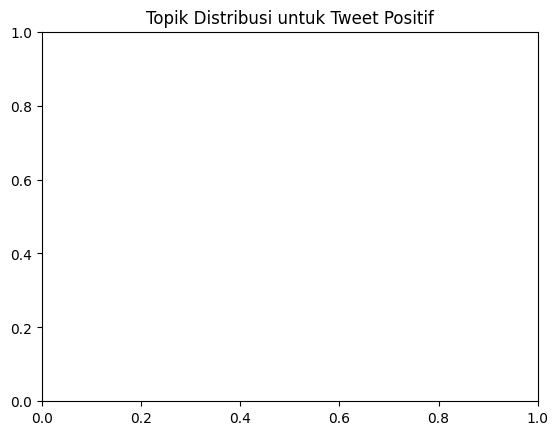

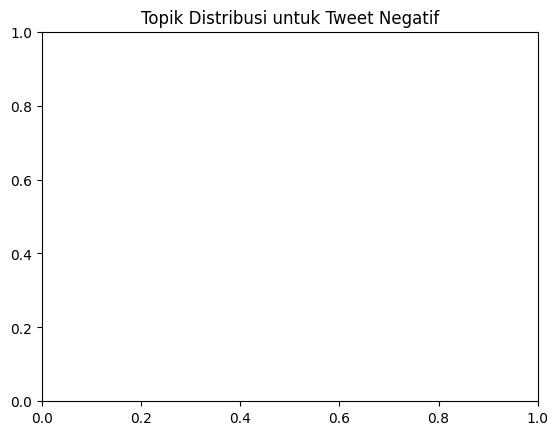

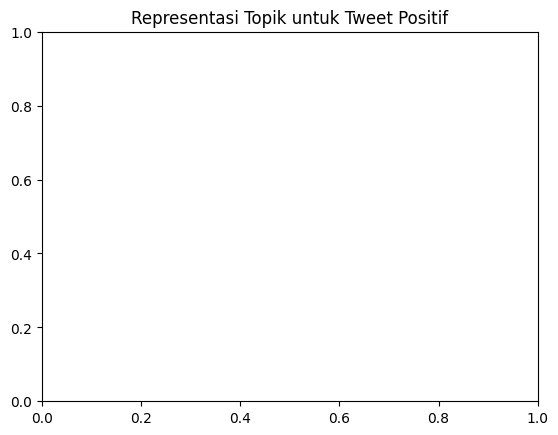

ValueError: zero-size array to reduction operation maximum which has no identity

In [20]:
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Step 1: Filter tweets berdasarkan sentiment (asumsikan df_positive dan df_negative sudah ada)
df_positive = df[df['sentiment'] == 'Positive']  # Menggunakan 'sentiment' kolom dengan nilai 'Positive' atau 'Negative'
df_negative = df[df['sentiment'] == 'Negative']

# Step 2: Konversi token menjadi string yang dibutuhkan oleh BERTopic
texts_positive = [' '.join(tokens) for tokens in df_positive['tokens']]
texts_negative = [' '.join(tokens) for tokens in df_negative['tokens']]

# Step 3: Buat model BERTopic untuk tweet positif
topic_model_positive = BERTopic(language="english")  # Sesuaikan bahasa jika bukan bahasa Inggris
topics_positive, probs_positive = topic_model_positive.fit_transform(texts_positive)

# Step 4: Buat model BERTopic untuk tweet negatif
topic_model_negative = BERTopic(language="english")  # Sesuaikan bahasa jika bukan bahasa Inggris
topics_negative, probs_negative = topic_model_negative.fit_transform(texts_negative)

# Step 5: Visualisasi distribusi topik untuk tweet positif
topic_model_positive.visualize_barchart()
plt.title("Topik Distribusi untuk Tweet Positif")
plt.show()

# Step 6: Visualisasi distribusi topik untuk tweet negatif
topic_model_negative.visualize_barchart()
plt.title("Topik Distribusi untuk Tweet Negatif")
plt.show()

# Step 7: Visualisasi representasi topik secara umumnya
fig_pos = topic_model_positive.visualize_topics()
plt.title("Representasi Topik untuk Tweet Positif")
plt.show()

fig_neg = topic_model_negative.visualize_topics()
plt.title("Representasi Topik untuk Tweet Negatif")
plt.show()